In [1]:
import numpy as np

In [2]:
M = np.array([[1, 2], [2, 4]])
# 计算2*2线性相关矩阵的秩。
np.linalg.matrix_rank(M, tol=None)

1

In [3]:
M

array([[1, 2],
       [2, 4]])

#### 显示手写体数字图片经PCA压缩后的二维空间分布

In [16]:
# 导入pandas用于数据读取和处理。
import pandas as pd

# 读入手写体图片识别任务的训练数据和测试数据
digits_train = pd.read_csv('datasets/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('datasets/optdigits/optdigits.tes', header=None)

# 分割训练数据的特征向量和标记。
X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]

In [17]:
# 导入PCA。 
from sklearn.decomposition import PCA

# 初始化一个可以将高维度特征向量（64维）压缩至2个维度的PCA。 
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)

In [18]:
type(y_digits)

pandas.core.series.Series

In [19]:
y_digits

0       0
1       0
2       7
3       4
4       6
       ..
3818    9
3819    4
3820    6
3821    6
3822    7
Name: 64, Length: 3823, dtype: int64

<IPython.core.display.Javascript object>


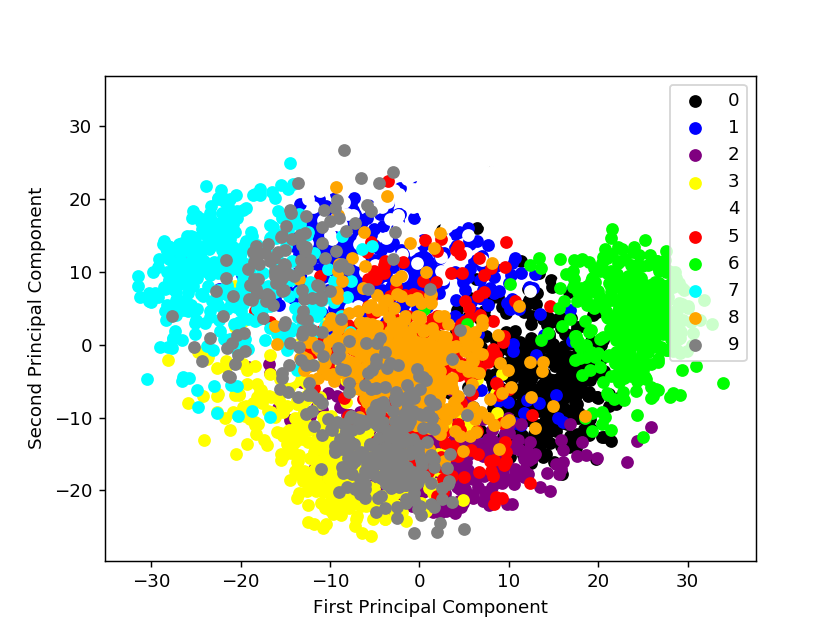

In [25]:
# 显示10类手写体数字图片经PCA压缩后的2维空间分布。 
from matplotlib import pyplot as plt
%matplotlib notebook

def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits.to_numpy() == i]
        py = X_pca[:, 1][y_digits.to_numpy()== i]
        plt.scatter(px, py, c=colors[i])
    
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
plot_pca_scatter()

#### 原始像素特征与PCA压缩重建的低维特征，在相同配置的SVM上识别性能的差异

In [30]:
# 对训练数据、测试数据进行特征向量（图片像素）与分类目标的分隔。
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

# 导入基于线性核的支持向量机分类器。
from sklearn.svm import LinearSVC

In [35]:
# 对原始64维像素特征的训练数据进行建模，并在测试数据上做出预测
svc = LinearSVC(max_iter=1000000)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)

In [36]:
# 使用PCA将原64维的图像数据压缩到20个维度。
estimator = PCA(n_components=20)

# 利用训练特征决定（fit）20个正交维度的方向，并转化（transform）原训练特征。
pca_X_train = estimator.fit_transform(X_train)
# 测试特征同上
pca_X_test = estimator.transform(X_test)

In [37]:
# 对压缩过后的20维特征的训练数据进行建模，并在测试数据上做出预测
pca_svc = LinearSVC(max_iter=1000000)
pca_svc.fit(pca_X_train, y_train)
pca_y_predict = pca_svc.predict(pca_X_test)

In [39]:
# 导入classification_report用于更加细致的分类性能分析。
from sklearn.metrics import classification_report

In [41]:
# 对使用原始图像高维像素特征训练的支持向量机分类器的性能作出评估。
print(svc.score(X_test, y_test))
print(classification_report(y_test, y_predict, 
                            target_names=np.arange(10).astype(str))
     )

# 对使用PCA压缩重建的低维图像特征训练的支持向量机分类器的性能作出评估。
print(pca_svc.score(pca_X_test, y_test))
print(classification_report(y_test, pca_y_predict, 
                            target_names=np.arange(10).astype(str))
     )

0.9410127991096272
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.91      0.93      0.92       182
           2       0.99      0.97      0.98       177
           3       0.97      0.93      0.95       183
           4       0.94      0.97      0.95       181
           5       0.89      0.96      0.93       182
           6       0.99      0.97      0.98       181
           7       0.98      0.91      0.94       179
           8       0.89      0.89      0.89       174
           9       0.87      0.91      0.89       180

    accuracy                           0.94      1797
   macro avg       0.94      0.94      0.94      1797
weighted avg       0.94      0.94      0.94      1797

0.9287701725097385
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       178
           1       0.89      0.89      0.89       182
           2       0.97      0.98      0